<a href="https://colab.research.google.com/github/michalhal92/kurs-analityka-danych/blob/main/Python_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

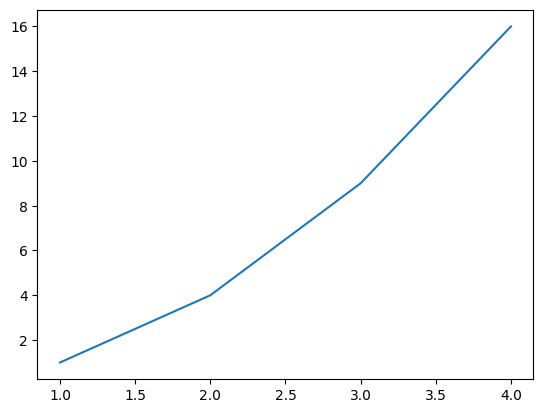

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

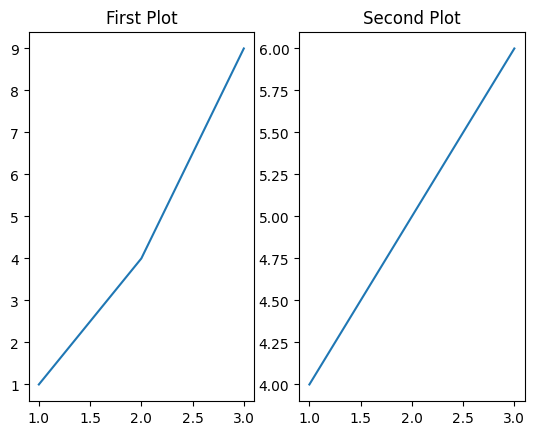

In [ ]:
# Pierwsza wizualizacja
plt.subplot(1, 2, 1)             # dzieli figurę na 1 wiersz i 2 kolumny, aktywuje pierwszy wykres (lewy)
plt.plot([1, 2, 3], [1, 4, 9])  # rysuje wykres liniowy: x=[1,2,3], y=[1,4,9]
plt.title('First Plot')          # ustawia tytuł pierwszego wykresu

# Druga wizualizacja
plt.subplot(1, 2, 2)             # aktywuje drugi wykres w tej samej figurze (prawy)
plt.plot([1, 2, 3], [4, 5, 6])  # rysuje wykres liniowy: x=[1,2,3], y=[4,5,6]
plt.title('Second Plot')         # ustawia tytuł drugiego wykresu

plt.show()                      # wyświetla oba wykresy na jednej figurze

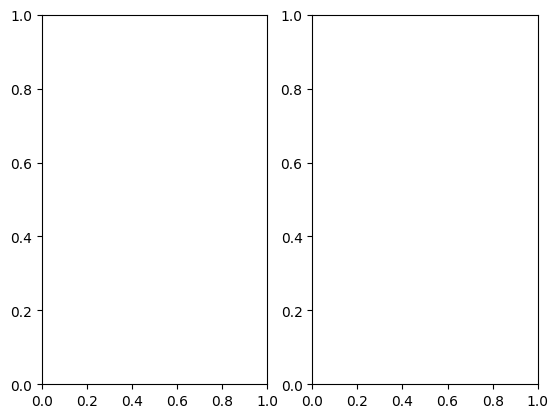

In [ ]:
fig, axs = plt.subplots(1, 2)  # 1 row, 2 columns

In [ ]:
axs

array([<Axes: >, <Axes: >], dtype=object)

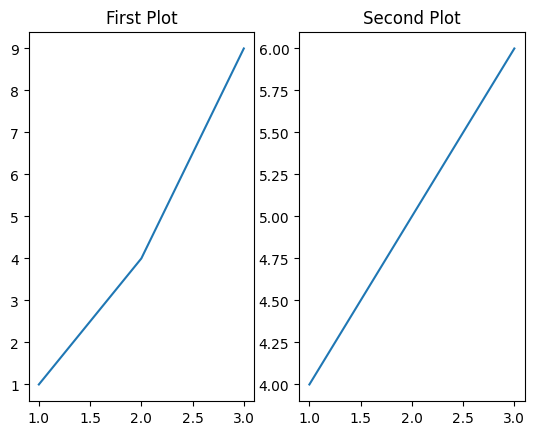

In [ ]:
fig, axs = plt.subplots(1, 2)  # 1 row, 2 columns

# Pierwsza wizualizacja
axs[0].plot([1, 2, 3], [1, 4, 9])
axs[0].set_title('First Plot')

# Druga wizualizacja
axs[1].plot([1, 2, 3], [4, 5, 6])
axs[1].set_title('Second Plot')

plt.show()

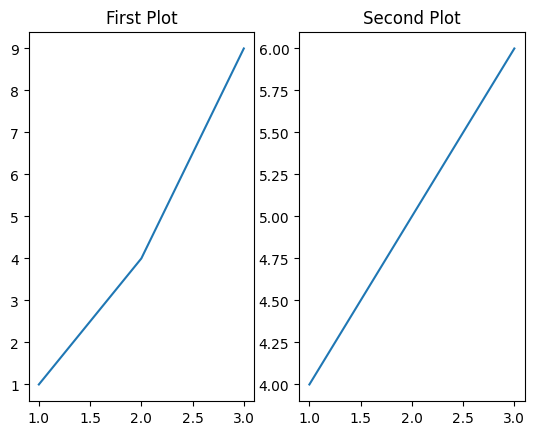

In [ ]:
# styl

fig, axs = plt.subplots(1, 2)  # 1 row, 2 columns

# Pierwsza wizualizacja
axs[0].plot([1, 2, 3], [1, 4, 9])
axs[0].set_title('First Plot')

# Druga wizualizacja
axs[1].plot([1, 2, 3], [4, 5, 6])
axs[1].set_title('Second Plot')

plt.style.use('ggplot')
plt.show()

Stworzenie pierwszego wykresu na podstawie danych

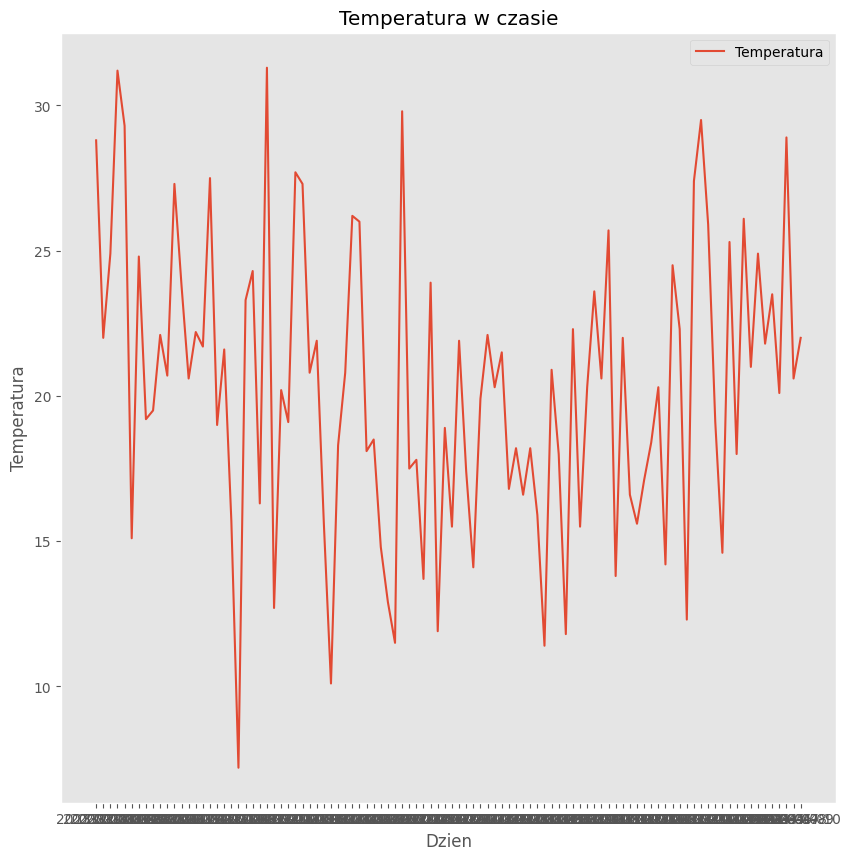

In [ ]:
# Załaduj dane
data = pd.read_csv('/content/sample_data/Kopia Weather_Data.csv')
plt.style.use('ggplot')

plt.figure(figsize=(10, 10))            # tworzy nową figurę o wymiarach 10x10 cali
plt.plot(data['Day'], data['Temperature'], label='Temperatura')  # rysuje wykres liniowy: oś X = 'Day', oś Y = 'Temperature'
plt.title('Temperatura w czasie')       # ustawia tytuł wykresu
plt.xlabel('Dzien')                      # podpis osi X
plt.ylabel('Temperatura')                # podpis osi Y
plt.legend()                            # dodaje legendę
plt.grid(False)                         # wyłącza siatkę na wykresie
plt.show()                             # wyświetla wykres

Stworzenie wykresu słupkowego na podstawie danych zagregowanych



In [ ]:
data['Month'] = pd.to_datetime(data['Day']).dt.month        # konwertuje kolumnę 'Day' na datetime i wyciąga miesiąc (1-12)
#print(data)
monthly_temp = data.groupby('Month')['Temperature'].mean().reset_index()
# grupuje dane po miesiącach i oblicza średnią temperaturę dla każdego miesiąca, resetuje indeks dla czytelności
print(monthly_temp)

   Month  Temperature
0      1    22.167742
1      2    18.489286
2      3    19.287097
3      4    22.690000


<ipython-input-13-777761162>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


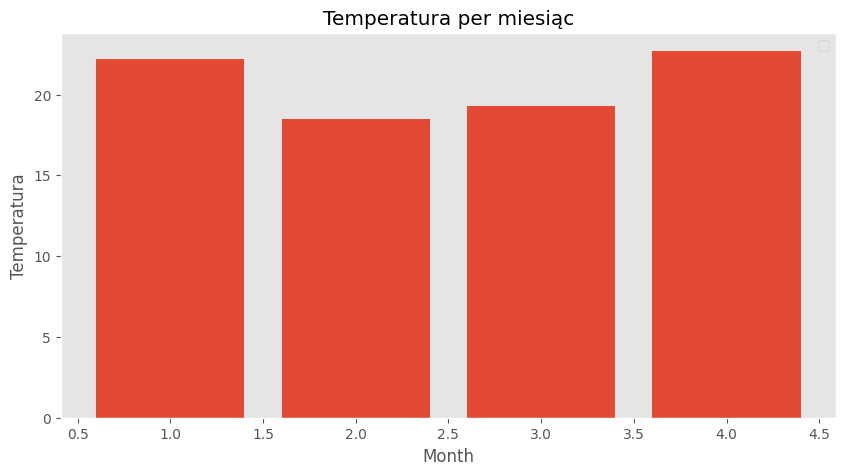

In [ ]:
plt.figure(figsize = (10, 5))
#plt.plot(monthly_temp.Month, monthly_temp.Temperature)
plt.bar(monthly_temp.Month, monthly_temp.Temperature)
plt.title('Temperatura per miesiąc')
plt.xlabel('Month')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(False)
plt.show()

Stworzenie wykresu kołowego

In [ ]:
data.head()

,Day,Temperature,Humidity,Wind_Speed,Month
0,2023-01-01,28.8,55.4,8.7,1
1,2023-01-02,22.0,66.4,24.1,1
2,2023-01-03,24.9,31.2,18.7,1
3,2023-01-04,31.2,48.1,9.3,1
4,2023-01-05,29.3,69.6,23.9,1


In [ ]:
data['Humidity Category'] = pd.cut(data['Humidity'], bins=[30, 50, 70, 90], labels=['Low', 'Medium', 'High'], right=False)
humidity_counts = data['Humidity Category'].value_counts()

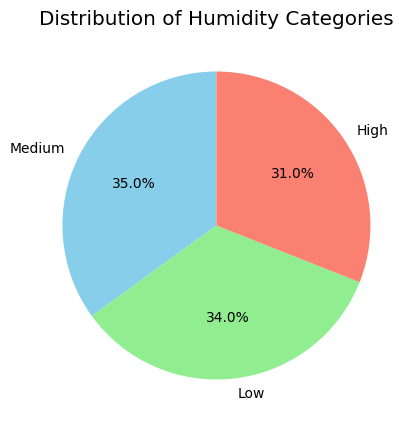

In [ ]:
plt.figure(figsize = (5, 5))
plt.pie(
    humidity_counts,                           # wartości do wykresu
    labels = humidity_counts.index,            # etykiety (np. 'Low', 'Medium', 'High')
    autopct = '%1.1f%%',                        # format procentów: np. 23.5%
    startangle = 90,                            # obraca wykres o 90°, by zaczynał od góry
    colors=['skyblue', 'lightgreen', 'salmon']  # kolory dla poszczególnych kategorii
)
plt.title('Distribution of Humidity Categories')
plt.show()

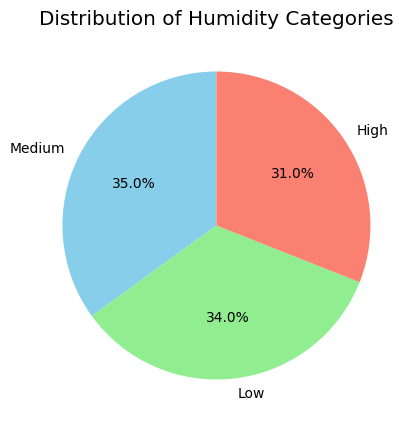

In [ ]:
# Grupowanie wilgotności na kategorie: Low, Medium, High
data['Humidity Category'] = pd.cut(
    data['Humidity'],                          # kolumna z surową wilgotnością
    bins=[30, 50, 70, 90],                     # granice przedziałów
    labels=['Low', 'Medium', 'High'],          # etykiety dla każdego przedziału
    right=False                                # lewostronnie domknięte (np. 50 należy do Medium, nie do Low)
)

# Zliczenie liczby przypadków dla każdej kategorii
humidity_counts = data['Humidity Category'].value_counts().reset_index(name='count')
humidity_counts.columns = ['Humidity Category', 'count']  # Nazwy kolumn: etykieta + liczba

# Tworzenie wykresu kołowego
plt.figure(figsize=(5, 5))                     # rozmiar figury (5x5 cali)
plt.pie(
    humidity_counts['count'],                  # wartości do wykresu (liczba wystąpień każdej kategorii)
    labels = humidity_counts['Humidity Category'],  # etykiety na wykresie (np. 'Low', 'Medium', 'High')
    autopct = '%1.1f%%',                        # format wyświetlania procentów: np. 23.5%
    startangle = 90,                            # obraca wykres o 90°, by pierwszy wycinek zaczynał się od góry
    colors=['skyblue', 'lightgreen', 'salmon']  # lista kolorów przypisana kolejno do kategorii
)
plt.title('Distribution of Humidity Categories')  # tytuł wykresu
plt.show()                                      # wyświetlenie wykresu

Tworzenie histogramu

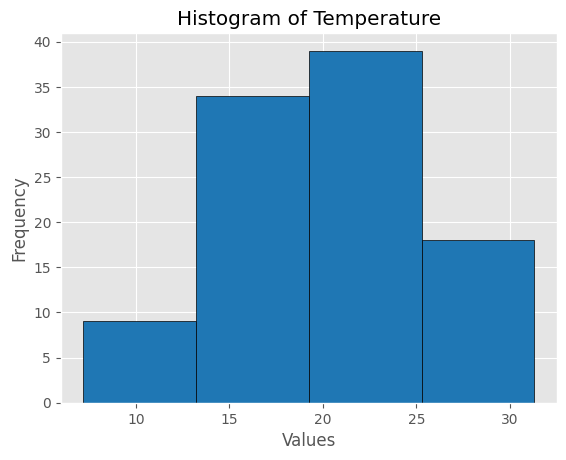

In [ ]:
# Create a histogram
plt.hist(
    data['Temperature'],        # dane do histogramu – pojedyncza kolumna z wartościami temperatury
    bins=4,                     # liczba przedziałów (słupków) – podzieli dane na 4 grupy
    color='tab:blue',           # kolor wypełnienia słupków (niebieski z palety "tab")
    edgecolor='black'           # kolor krawędzi słupków – dla lepszej czytelności
)

# Adding labels and title
plt.xlabel('Values')            # etykieta osi X – opisuje zakres temperatury
plt.ylabel('Frequency')         # etykieta osi Y – liczba wartości w każdym przedziale
plt.title('Histogram of Temperature')  # tytuł wykresu

# Show the plot
plt.show()                      # wyświetlenie wykresu

Zapisanie wykresu

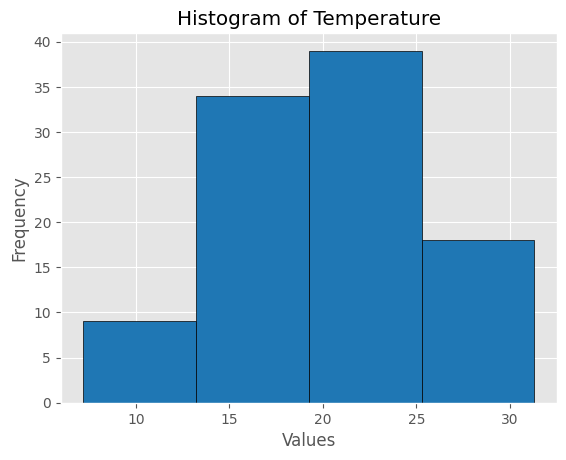

In [ ]:
# Create a histogram
plt.hist(data['Temperature'], bins=4, color='tab:blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Zapis wykresu
plt.savefig('histogram_wykres.png', format = 'png')


Formatowanie wykresu

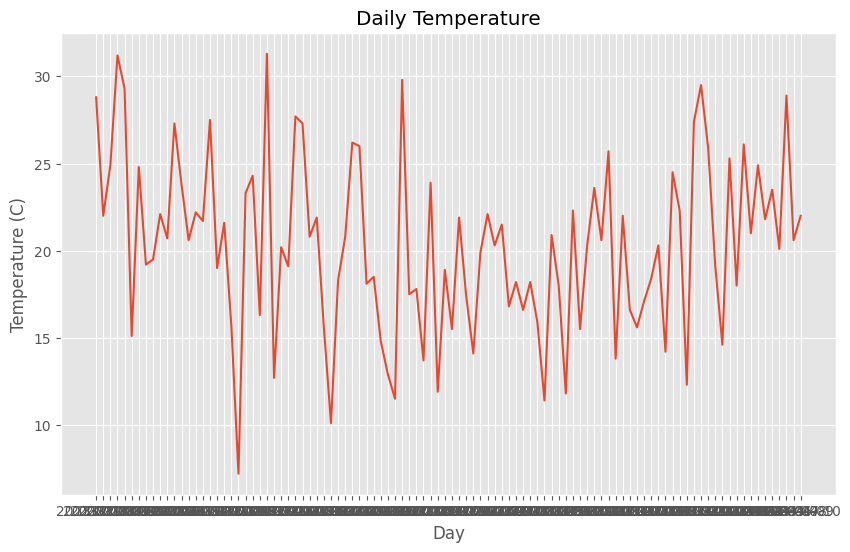

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Temperature'])
plt.title('Daily Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, '2023-01-01'),
  Text(1, 0, '2023-01-02'),
  Text(2, 0, '2023-01-03'),
  Text(3, 0, '2023-01-04'),
  Text(4, 0, '2023-01-05'),
  Text(5, 0, '2023-01-06'),
  Text(6, 0, '2023-01-07'),
  Text(7, 0, '2023-01-08'),
  Text(8, 0, '2023-01-09'),
  Text(9, 0, '2023-01-10'),
  Text(10, 0, '2023-01-11'),
  Text(11, 0, '2023-01-12'),
  Text(12, 0, '2023-01-13'),
  Text(13, 0, '2023-01-14'),
  Text(14, 0,

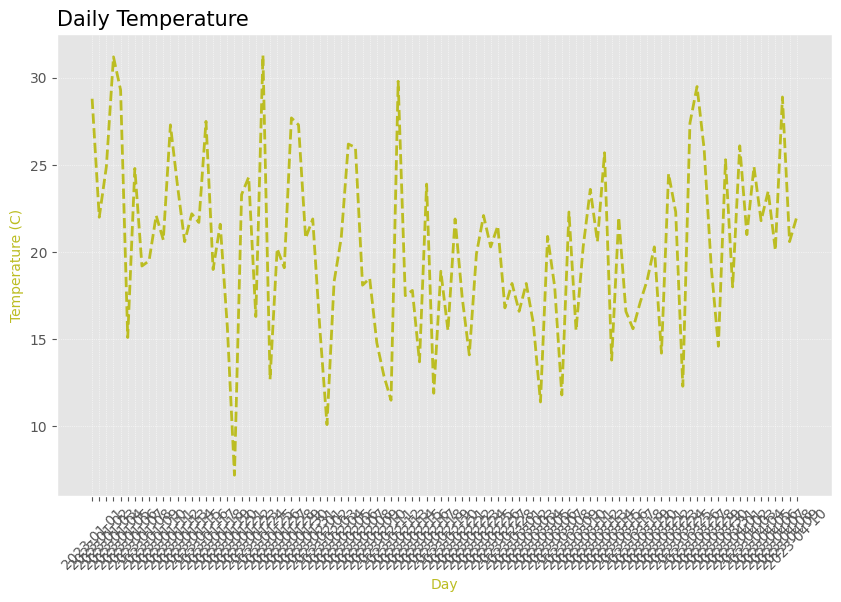

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))                         # ustawia rozmiar figury na 10x6 cali
plt.plot(
    data['Day'],                                    # dane na osi X (np. daty)
    data['Temperature'],                            # dane na osi Y (temperatura)
    color='tab:olive',                              # kolor linii (oliwkowy)
    linestyle='dashed',                             # styl linii przerywanej
    linewidth=2                                     # grubość linii
)
plt.title(
    'Daily Temperature',                            # tytuł wykresu
    fontsize=15,                                    # rozmiar czcionki tytułu
    loc='left'                                      # pozycja tytułu – wyrównanie do lewej
)
plt.xlabel(
    'Day',                                          # etykieta osi X
    fontsize=10,                                    # rozmiar czcionki opisu osi X
    color='tab:olive'                               # kolor tekstu osi X
)
plt.ylabel(
    'Temperature (C)',                              # etykieta osi Y
    fontsize=10,                                    # rozmiar czcionki opisu osi Y
    color='tab:olive'                               # kolor tekstu osi Y
)
plt.grid(
    True,                                           # włącza siatkę
    linestyle=':',                                  # styl siatki: kropkowana linia
    linewidth=0.5                                   # grubość linii siatki
)
plt.xticks(rotation=45)


Ćwiczenia na poprzednim zbiorze

In [ ]:
# Ładowanie danych
user_behaviors = pd.read_excel('/content/sample_data/Kopia User_Behavior_Data.xlsx')
user_profiles = pd.read_excel('/content/sample_data/Kopia User_Profiles.xlsx')

# Połączenie obu zbiorów danych na podstawie UserID:
# Merging the datasets
merged_data = pd.merge(user_behaviors, user_profiles, on='UserID', how='left')


Podwójna oś

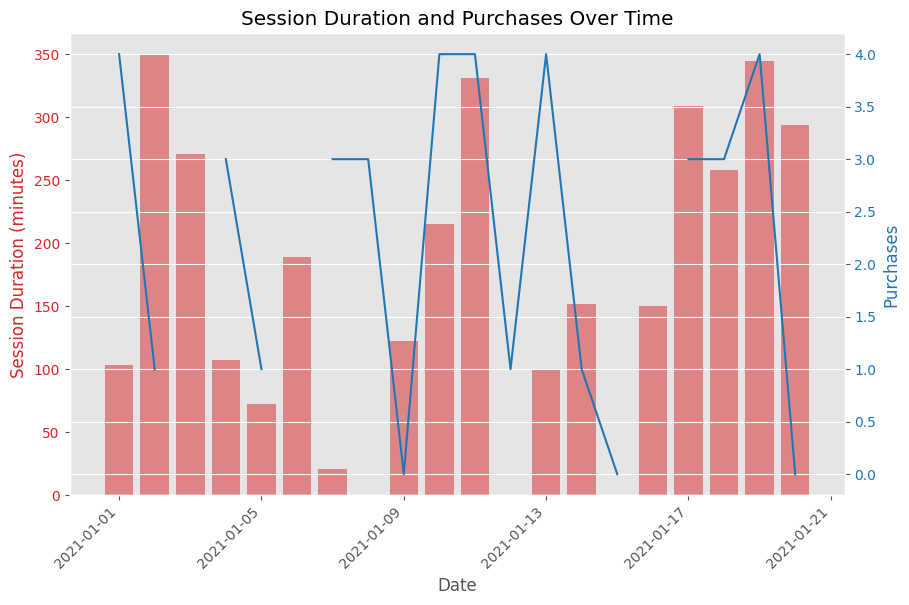

In [ ]:
# Converting Date to datetime format and sorting
merged_data['Date'] = pd.to_datetime(merged_data['Date'])           # konwertuje kolumnę 'Date' na format datetime
merged_data_sorted = merged_data.sort_values(by='Date')             # sortuje dane rosnąco według daty

# Creating the line plot for session duration and purchases over time
fig, ax1 = plt.subplots(figsize=(10, 6))                           # tworzy figurę i pierwszy wykres o rozmiarze 10x6 cali

ax1.set_xlabel('Date')                                              # ustawia etykietę osi X
ax1.set_ylabel('Session Duration (minutes)', color='tab:red')       # ustawia etykietę osi Y (lewa), kolor czerwony
ax1.bar(
    merged_data_sorted['Date'],                                     # dane na osi X (daty)
    merged_data_sorted['Session_Duration'],                         # dane na osi Y (czas sesji)
    color='tab:red',                                                # kolor słupków czerwony
    alpha=0.5                                                      # przezroczystość słupków
)
ax1.tick_params(axis='y', labelcolor='tab:red')                    # kolor etykiet osi Y (lewej) na czerwono

# Format the x-axis
plt.xticks(rotation=45, ha='right')                                # obraca etykiety osi X o 45° i wyrównuje je do prawej
plt.grid(False)                                                    # wyłącza siatkę

ax2 = ax1.twinx()                                                  # tworzy drugą oś Y, dzieląc oś X z ax1
ax2.set_ylabel('Purchases', color='tab:blue')                      # ustawia etykietę osi Y (prawa), kolor niebieski
ax2.plot(
    merged_data_sorted['Date'],                                     # dane na osi X (daty)
    merged_data_sorted['Purchases'],                               # dane na osi Y (liczba zakupów)
    color='tab:blue'                                                # kolor wykresu liniowego niebieski
)
ax2.tick_params(axis='y', labelcolor='tab:blue')                   # kolor etykiet osi Y (prawej) na niebiesko

plt.title('Session Duration and Purchases Over Time')              # tytuł wykresu
# fig.tight_layout()                                               # dopasowuje układ, by etykiety się nie obcinały (opcjonalne)
plt.show()                                                        # wyświetla wykres


Stwórz wykres średniej ilości trwania sesji per grupa (membership)

Stwórz wykres sumy zakupów per kraj


Stwórz wykres średniej ilości zobaczonych stron per rodzaj urządzenia.

Stwórz wykres kołowy ilości sesji per urządzenie.

# Praca domowa
Praca z połączonymi zbiorami User_Profiles i User_Behavior_Data.

Z1: Stwórz wykres sumy zakupów per kraj

     Country  Purchases
0  Australia       12.0
1     Canada       13.0
2     France        1.0
3    Germany       12.0
4         UK        0.0
5        USA        1.0


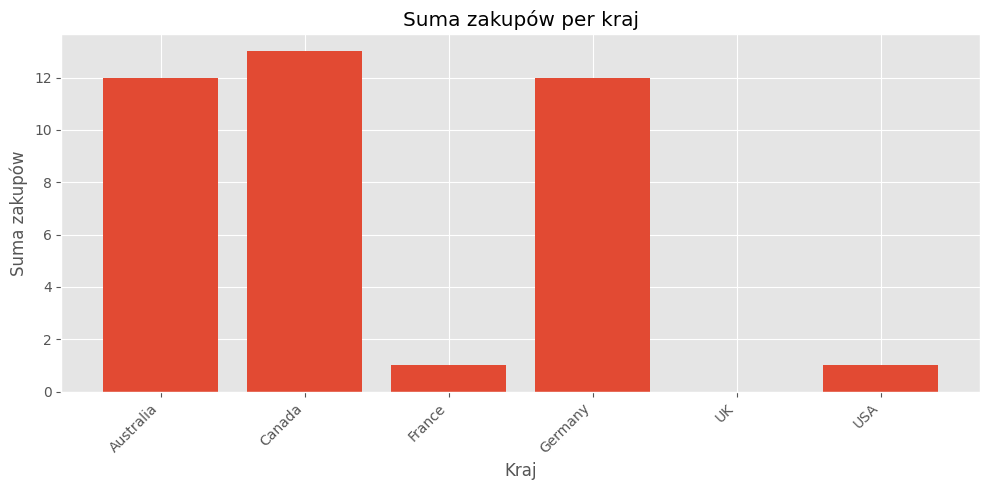

In [ ]:
#Zadanie: Stwórz wykres sumy zakupów per kraj
import matplotlib.pyplot as plt
# Grupowanie i sumowanie
purchases_by_country = merged_data.groupby('Country')['Purchases'].sum().reset_index()
print(purchases_by_country)
# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 5))
plt.bar(purchases_by_country['Country'], purchases_by_country['Purchases'])
plt.title('Suma zakupów per kraj')
plt.xlabel('Kraj')
plt.ylabel('Suma zakupów')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


Dla chętnych:
Z2*: Stwórz wykres średniej ilości zobaczonych stron per rodzaj urządzenia.

    Device  Average_Pages_Viewed
0  Desktop             12.250000
1   Mobile              6.900000
2   Tablet             15.333333


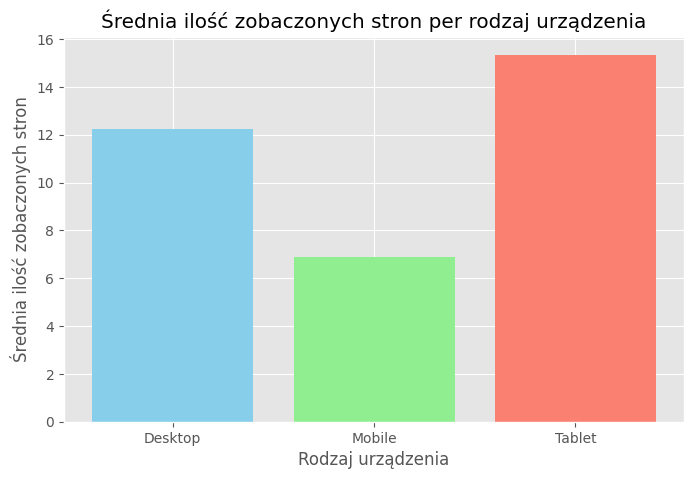

In [ ]:
# Z2*: Stwórz wykres średniej ilości zobaczonych stron per rodzaj urządzenia.
import matplotlib.pyplot as plt

pages_per_device = merged_data.groupby('Device')['Pages_Viewed'].mean().reset_index()
pages_per_device.rename(columns={'Pages_Viewed': 'Average_Pages_Viewed'}, inplace=True)
print(pages_per_device)

plt.figure(figsize=(8, 5))
plt.bar(pages_per_device['Device'], pages_per_device['Average_Pages_Viewed'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Średnia ilość zobaczonych stron per rodzaj urządzenia')
plt.xlabel('Rodzaj urządzenia')
plt.ylabel('Średnia ilość zobaczonych stron')
plt.show()


Z3*: Stwórz wykres kołowy ilości sesji per urządzenie.